### 熟悉创建ImageDtaBunch的几种方法

In [1]:
import fastai
from fastai import *
from fastai.vision import *

In [2]:
path = URLs.MNIST_SAMPLE
path

'http://files.fast.ai/data/examples/mnist_sample'

In [4]:
data_root = Path("F:\\data\\fastai")

In [5]:
fname = data_root/ 'mnist_sample.tgz'
dest = data_root/'mnist_sample'
print(fname)
print(dest)

F:\data\fastai\mnist_sample.tgz
F:\data\fastai\mnist_sample


In [10]:
data_path = untar_data(path,fname=fname,dest=dest)

In [11]:
data_path

WindowsPath('F:/data/fastai/mnist_sample')

In [8]:
tfms = get_transforms(do_flip=False)

#### from_folder

In [13]:
data = ImageDataBunch.from_folder(data_path,ds_tfms = tfms,size = 26)
data

ImageDataBunch;

Train: LabelList
y: CategoryList (12396 items)
[Category 3, Category 3, Category 3, Category 3, Category 3]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (12396 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Valid: LabelList
y: CategoryList (2038 items)
[Category 3, Category 3, Category 3, Category 3, Category 3]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (2038 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Test: None

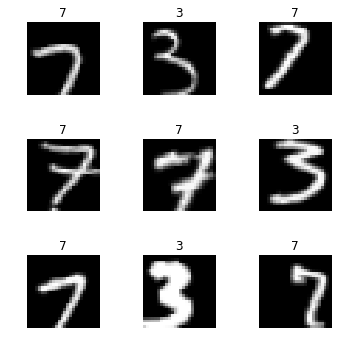

In [17]:
data.show_batch(3,figsize=(5,5))

In [18]:
learner = create_cnn(data,models.resnet18,metrics=error_rate)
learner.fit(1)

epoch     train_loss  valid_loss  error_rate
1         0.199316    0.080093    0.027969    


#### 2.from_df

In [19]:
df = pd.read_csv(data_path/"labels.csv")
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [20]:
data = ImageDataBunch.from_df(data_path,df,ds_tfms = tfms,size=26)
data

ImageDataBunch;

Train: LabelList
y: CategoryList (11548 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (11548 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Valid: LabelList
y: CategoryList (2886 items)
[Category 1, Category 0, Category 1, Category 0, Category 1]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (2886 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Test: None

In [21]:
learner_df = create_cnn(data,models.resnet18,metrics = accuracy)
learner_df.fit(1)

epoch     train_loss  valid_loss  accuracy
1         0.192174    0.095539    0.967082  


#### from_csv

In [22]:
data_csv = ImageDataBunch.from_csv(data_path,ds_tfms = tfms,size = 26)
data_csv

ImageDataBunch;

Train: LabelList
y: CategoryList (11548 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (11548 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Valid: LabelList
y: CategoryList (2886 items)
[Category 1, Category 0, Category 1, Category 1, Category 0]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (2886 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Test: None

In [23]:
learner_csv = create_cnn(data_csv,models.resnet18,metrics = accuracy)
learner_csv.fit(1)

epoch     train_loss  valid_loss  accuracy
1         0.212649    0.078168    0.972973  


#### from_name_func

In [24]:
fnams = [ data_path/name for name in df['name'] ]
fnams[:5]

[WindowsPath('F:/data/fastai/mnist_sample/train/3/7463.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/21102.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/31559.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/46882.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/26209.png')]

In [25]:
data_name = ImageDataBunch.from_name_func(data_path,fnames=fnams,label_func=lambda x : '3' if '/3/' in str(x) else '7',ds_tfms = tfms,size = 26)
data_name

ImageDataBunch;

Train: LabelList
y: CategoryList (11548 items)
[Category 7, Category 7, Category 7, Category 7, Category 7]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (11548 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Valid: LabelList
y: CategoryList (2886 items)
[Category 7, Category 7, Category 7, Category 7, Category 7]...
Path: F:\data\fastai\mnist_sample
x: ImageItemList (2886 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: F:\data\fastai\mnist_sample;

Test: None

In [26]:
data.classes

[0, 1]

#### from_lists

In [30]:
fnams

[WindowsPath('F:/data/fastai/mnist_sample/train/3/7463.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/21102.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/31559.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/46882.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/26209.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/41391.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/11910.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/52435.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/21660.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/1226.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/42898.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/33877.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/50431.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/45398.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/56616.png'),
 WindowsPath('F:/data/fastai/mnist_sample/train/3/29356.p

In [37]:
labels = [('3' if '\\3\\' in str(x) else '7') for x in fnams]
labels[-5:]

['7', '7', '7', '7', '7']

In [36]:
data_from_list = ImageDataBunch.from_lists(data_path,fnames=fnams,labels=labels,ds_tfms = tfms,size = 24)
data_from_list.classes

['3', '7']